In [1]:
import httpx  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
osrm_host = 'http://127.0.0.1'
osrm_port = 5000

In [3]:
def get_data(lon_src , lat_src,  lon_dst , lat_dst): 
    try: 
        request_url = f"{osrm_host}:{osrm_port}/route/v1/driving/{lon_src},{lat_src};{lon_dst},{lat_dst}"
        respons = httpx.get(request_url , trust_env=False, timeout=10).json() # prevent using proxy if its Fasle
        best_route= respons['routes'][0]
        duration = best_route['duration']
        distance = best_route['distance']
        return duration ,distance 
    except: 
        return np.nan ,np.nan

In [4]:
duration , distance = get_data(40.71792543422583, 40.77636800029203, 40.7851, -73.9473626995488)
duration , distance  # testing our url and its response

(651.7, 3646)

In [5]:
data = pd.read_csv("./data/nyc_taxi_data_2014.csv" , low_memory=False)
df = data.sample(frac=.04).reset_index(drop=True)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-16 15:52:38,2014-01-16 16:03:06,1,0.90,-73.988694,40.753604,1,N,-73.983849,40.744761,CRD,8.0,0.0,0.5,1.70,0.00,10.20
1,CMT,2014-01-15 19:47:24,2014-01-15 20:05:04,1,1.40,-73.952021,40.774771,1,N,-73.966421,40.764856,CSH,11.5,1.0,0.5,0.00,0.00,13.00
2,VTS,2014-01-13 20:07:00,2014-01-13 20:20:00,1,6.05,-73.976485,40.739852,1,NaN,-73.896517,40.747027,CSH,19.0,0.5,0.5,0.00,5.33,25.33
3,VTS,2014-01-05 22:07:00,2014-01-05 22:10:00,1,0.54,-73.989052,40.741952,1,NaN,-73.991432,40.745102,CRD,4.0,0.5,0.5,1.12,0.00,6.12
4,CMT,2014-01-08 08:57:12,2014-01-08 09:24:02,2,15.80,-73.974403,40.746992,2,N,-73.783220,40.643858,CRD,52.0,0.0,0.5,10.00,5.33,67.83


In [6]:
df.isna().sum() 

vendor_id                  0
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
trip_distance              0
pickup_longitude           0
pickup_latitude            0
rate_code                  0
store_and_fwd_flag    304932
dropoff_longitude          2
dropoff_latitude           2
payment_type               0
fare_amount                0
surcharge                  0
mta_tax                    0
tip_amount                 0
tolls_amount               0
total_amount               0
dtype: int64

In [7]:
df.drop('store_and_fwd_flag' , axis=1 , inplace=True) # this feature is not that important

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

vendor_id            0
pickup_datetime      0
dropoff_datetime     0
passenger_count      0
trip_distance        0
pickup_longitude     0
pickup_latitude      0
rate_code            0
dropoff_longitude    0
dropoff_latitude     0
payment_type         0
fare_amount          0
surcharge            0
mta_tax              0
tip_amount           0
tolls_amount         0
total_amount         0
dtype: int64

In [10]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-16 15:52:38,2014-01-16 16:03:06,1,0.90,-73.988694,40.753604,1,-73.983849,40.744761,CRD,8.0,0.0,0.5,1.70,0.00,10.20
1,CMT,2014-01-15 19:47:24,2014-01-15 20:05:04,1,1.40,-73.952021,40.774771,1,-73.966421,40.764856,CSH,11.5,1.0,0.5,0.00,0.00,13.00
2,VTS,2014-01-13 20:07:00,2014-01-13 20:20:00,1,6.05,-73.976485,40.739852,1,-73.896517,40.747027,CSH,19.0,0.5,0.5,0.00,5.33,25.33
3,VTS,2014-01-05 22:07:00,2014-01-05 22:10:00,1,0.54,-73.989052,40.741952,1,-73.991432,40.745102,CRD,4.0,0.5,0.5,1.12,0.00,6.12
4,CMT,2014-01-08 08:57:12,2014-01-08 09:24:02,2,15.80,-73.974403,40.746992,2,-73.783220,40.643858,CRD,52.0,0.0,0.5,10.00,5.33,67.83


### i picked sample of data for request , becuase 300k local request put pressure on my ssd and its time consuming 

In [11]:
sample_df = df.sample(frac=.05,  random_state=42).reset_index(drop=True)
sample_df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-01-18 09:16:00,2014-01-18 09:20:00,2,1.29,-73.998217,40.740882,1,-74.011235,40.729607,CSH,6.0,0.0,0.5,0.0,0.00,6.50
1,CMT,2014-01-08 19:46:04,2014-01-08 19:52:13,1,1.30,-73.988413,40.744412,1,-74.002947,40.733310,CRD,6.5,1.0,0.5,2.0,0.00,10.00
2,CMT,2014-01-29 10:08:47,2014-01-29 10:32:30,1,6.40,-74.008389,40.705462,1,-73.970331,40.764716,CRD,22.5,0.0,0.5,4.6,0.00,27.60
3,VTS,2014-02-03 19:49:00,2014-02-03 19:52:00,1,0.58,-73.976520,40.765847,1,-73.985832,40.769192,CRD,4.0,1.0,0.5,1.0,0.00,6.50
4,VTS,2014-01-13 07:02:00,2014-01-13 07:36:00,1,15.47,-73.970243,40.796732,1,-74.038802,40.626092,CSH,44.5,0.0,0.5,0.0,5.33,50.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,VTS,2014-01-17 13:06:00,2014-01-17 13:20:00,1,4.21,-73.972272,40.763685,1,-73.959298,40.730207,CRD,15.0,0.0,0.5,3.0,0.00,18.50
29996,CMT,2014-01-21 01:16:46,2014-01-21 01:35:28,1,6.50,-73.999432,40.738529,1,-73.920014,40.762671,CRD,20.5,0.5,0.5,4.3,0.00,25.80
29997,VTS,2014-01-31 23:08:00,2014-01-31 23:14:00,1,0.80,-73.987100,40.722522,1,-74.000745,40.727405,CRD,6.0,0.5,0.5,1.0,0.00,8.00
29998,VTS,2014-01-29 09:19:00,2014-01-29 09:32:00,1,1.64,-74.005040,40.737582,1,-73.997617,40.730047,CRD,9.5,0.0,0.5,1.0,0.00,11.00


### lets create two features , one for distance traveled , and one for trip duration with help of OSRM

In [12]:
OSRM_df = sample_df.apply(lambda x :pd.Series(get_data(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude'])), axis=1)

In [13]:
OSRM_df.columns = ['OSRM_duration' , 'OSRM_distance']
OSRM_df

,OSRM_duration,OSRM_distance
0,300.4,2081.0
1,300.3,2187.2
2,924.2,10176.1
3,168.2,1518.3
4,2067.7,25060.8
...,...,...
29995,654.9,6511.3
29996,1003.8,10001.5
29997,247.0,1842.0
29998,188.5,1371.8


In [14]:
df = pd.concat([sample_df , OSRM_df], axis=1)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,OSRM_duration,OSRM_distance
0,VTS,2014-01-18 09:16:00,2014-01-18 09:20:00,2,1.29,-73.998217,40.740882,1,-74.011235,40.729607,CSH,6.0,0.0,0.5,0.0,0.00,6.50,300.4,2081.0
1,CMT,2014-01-08 19:46:04,2014-01-08 19:52:13,1,1.30,-73.988413,40.744412,1,-74.002947,40.733310,CRD,6.5,1.0,0.5,2.0,0.00,10.00,300.3,2187.2
2,CMT,2014-01-29 10:08:47,2014-01-29 10:32:30,1,6.40,-74.008389,40.705462,1,-73.970331,40.764716,CRD,22.5,0.0,0.5,4.6,0.00,27.60,924.2,10176.1
3,VTS,2014-02-03 19:49:00,2014-02-03 19:52:00,1,0.58,-73.976520,40.765847,1,-73.985832,40.769192,CRD,4.0,1.0,0.5,1.0,0.00,6.50,168.2,1518.3
4,VTS,2014-01-13 07:02:00,2014-01-13 07:36:00,1,15.47,-73.970243,40.796732,1,-74.038802,40.626092,CSH,44.5,0.0,0.5,0.0,5.33,50.33,2067.7,25060.8


### lets create some feature that might be usefull and affect our target like holidays , weekends and rush hours 


In [15]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['is_weekend'] = df['pickup_datetime'].dt.weekday.apply(lambda x : 1 if x>5 else 0)
df['is_rush_hour'] = df['pickup_datetime'].dt.hour.apply(lambda x : 1 if x in [7, 8,9 , 17, 18, 19] else 0)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,...,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,OSRM_duration,OSRM_distance,is_weekend,is_rush_hour
0,VTS,2014-01-18 09:16:00,2014-01-18 09:20:00,2,1.29,-73.998217,40.740882,1,-74.011235,40.729607,...,6.0,0.0,0.5,0.0,0.00,6.50,300.4,2081.0,0,1
1,CMT,2014-01-08 19:46:04,2014-01-08 19:52:13,1,1.30,-73.988413,40.744412,1,-74.002947,40.733310,...,6.5,1.0,0.5,2.0,0.00,10.00,300.3,2187.2,0,1
2,CMT,2014-01-29 10:08:47,2014-01-29 10:32:30,1,6.40,-74.008389,40.705462,1,-73.970331,40.764716,...,22.5,0.0,0.5,4.6,0.00,27.60,924.2,10176.1,0,0
3,VTS,2014-02-03 19:49:00,2014-02-03 19:52:00,1,0.58,-73.976520,40.765847,1,-73.985832,40.769192,...,4.0,1.0,0.5,1.0,0.00,6.50,168.2,1518.3,0,1
4,VTS,2014-01-13 07:02:00,2014-01-13 07:36:00,1,15.47,-73.970243,40.796732,1,-74.038802,40.626092,...,44.5,0.0,0.5,0.0,5.33,50.33,2067.7,25060.8,0,1


#### since we used longitude and datae time to extract feature , we only keep numerical columns 


In [16]:
df = df.select_dtypes(include=[int , float])
df.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,OSRM_duration,OSRM_distance,is_weekend,is_rush_hour
0,2,1.29,-73.998217,40.740882,1,-74.011235,40.729607,6.0,0.0,0.5,0.0,0.00,6.50,300.4,2081.0,0,1
1,1,1.30,-73.988413,40.744412,1,-74.002947,40.733310,6.5,1.0,0.5,2.0,0.00,10.00,300.3,2187.2,0,1
2,1,6.40,-74.008389,40.705462,1,-73.970331,40.764716,22.5,0.0,0.5,4.6,0.00,27.60,924.2,10176.1,0,0
3,1,0.58,-73.976520,40.765847,1,-73.985832,40.769192,4.0,1.0,0.5,1.0,0.00,6.50,168.2,1518.3,0,1
4,1,15.47,-73.970243,40.796732,1,-74.038802,40.626092,44.5,0.0,0.5,0.0,5.33,50.33,2067.7,25060.8,0,1


In [17]:
df.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,OSRM_duration,OSRM_distance,is_weekend,is_rush_hour
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29999.00000,29999.000000,30000.000000,30000.000000
mean,1.701833,2.780327,-72.897948,40.157052,1.031200,-72.837851,40.124998,12.050444,0.311527,0.498267,1.450405,0.233366,14.544771,458.31225,4674.897557,0.128667,0.299933
std,1.371323,3.281625,8.863233,4.882496,0.265636,9.099548,5.012828,10.417915,0.362004,0.029389,2.167556,1.153793,12.342284,597.50940,9804.319159,0.334836,0.458236
min,1.000000,0.000000,-74.368510,0.000000,0.000000,-74.797875,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.991953,40.735031,1.000000,-73.991192,40.734312,6.500000,0.000000,0.500000,0.000000,0.000000,8.000000,205.30000,1620.800000,0.000000,0.000000
50%,1.000000,1.700000,-73.981780,40.752949,1.000000,-73.980145,40.753502,9.000000,0.000000,0.500000,1.000000,0.000000,11.000000,335.80000,2738.200000,0.000000,0.000000
75%,2.000000,3.080000,-73.967352,40.767177,1.000000,-73.963508,40.768377,13.500000,0.500000,0.500000,2.000000,0.000000,16.100000,560.30000,4919.000000,0.000000,1.000000
max,6.000000,73.610000,0.000000,40.915717,5.000000,0.000000,41.032520,358.210000,1.800000,0.500000,71.000000,16.750000,358.210000,13315.70000,230016.100000,1.000000,1.000000


looking at the mean and the maximum value i detected that column like osrm_distance , tolls_amound , and similar feature has extream values that need to be normalized for better training 

### lets visualize outliers in our whole data set

Text(0.5, 1.0, '68 samples are outliers , low and inaccurate')

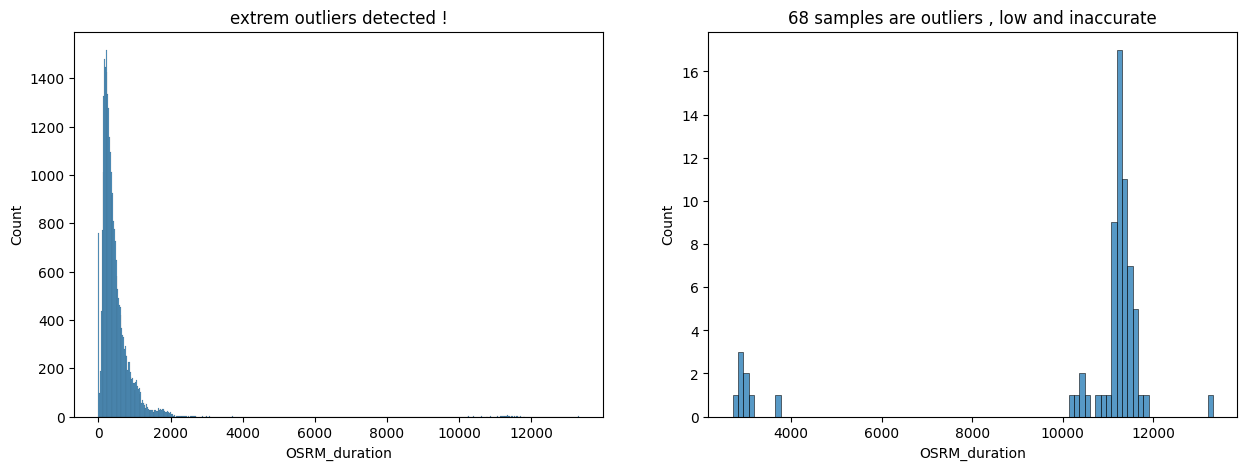

In [18]:
# lets check out our outliers 

fig ,axes  = plt.subplots(1, 2 , figsize=(15, 5))
sns.histplot(df['OSRM_duration'] , ax = axes[0])
axes[0].set_title('extrem outliers detected !')

Q1 = df['OSRM_duration'].quantile(0.05)
Q3 = df['OSRM_duration'].quantile(0.95)

IQR = Q3 - Q1

bottom_threshold = Q1 -  1.5 *IQR
top_threshold = Q3 +  1.5 *IQR

outliers_data=df[(df['OSRM_duration'] < bottom_threshold) | 
                             (df['OSRM_duration'] > top_threshold)] 
# i didn't use IQR in this case becuase i wanted to remove zero values on left 
# and extream value on right , so i decided its better to use absolute values ;)

sns.histplot(outliers_data['OSRM_duration'] , ax=axes[1])
axes[1].set_title(f'{outliers_data.count().tolist()[0]} samples are outliers , low and inaccurate')

### since zero distance is not logical , so i remove the zeros manually

In [19]:
(df['OSRM_duration'] ==0).sum()

np.int64(669)

In [20]:
df = df[df['OSRM_duration'] !=0]

#### `!fixed` first we create train and test , to only remove outliers on train data and keeping the raw data for testing and prevent data leakage

In [21]:
x  = df.drop('OSRM_duration' ,axis=1)
y = df['OSRM_duration']

In [22]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=.2)

#### `!fixed` , i only removed outliers from train data set and its corresponding y and let test be untouched

In [23]:
def clean_from_outliers(train_df, target_df):
    Q1 = target_df.quantile(0.05)
    Q3 = target_df.quantile(0.95)
    IQR = Q3 - Q1
    bottom_threshold = Q1 -  1.5 *IQR
    top_threshold = Q3 +  1.5 *IQR
    condition = target_df.between(bottom_threshold , top_threshold)
    return train_df[condition] , target_df[condition]

cleaned_train , cleaned_target = clean_from_outliers(x_train , y_train)

### lets see how features are related to each other and the target

In [24]:
target_corr =df.corr()['OSRM_duration']
target_corr = pd.DataFrame(target_corr.drop(['OSRM_duration' ,'is_weekend' , 'is_rush_hour']))
# i just wanted to see target correlation with other features not themselves to themselves and also not for boolean values

Text(0.5, 1.0, 'rush hour travels count and average duration')

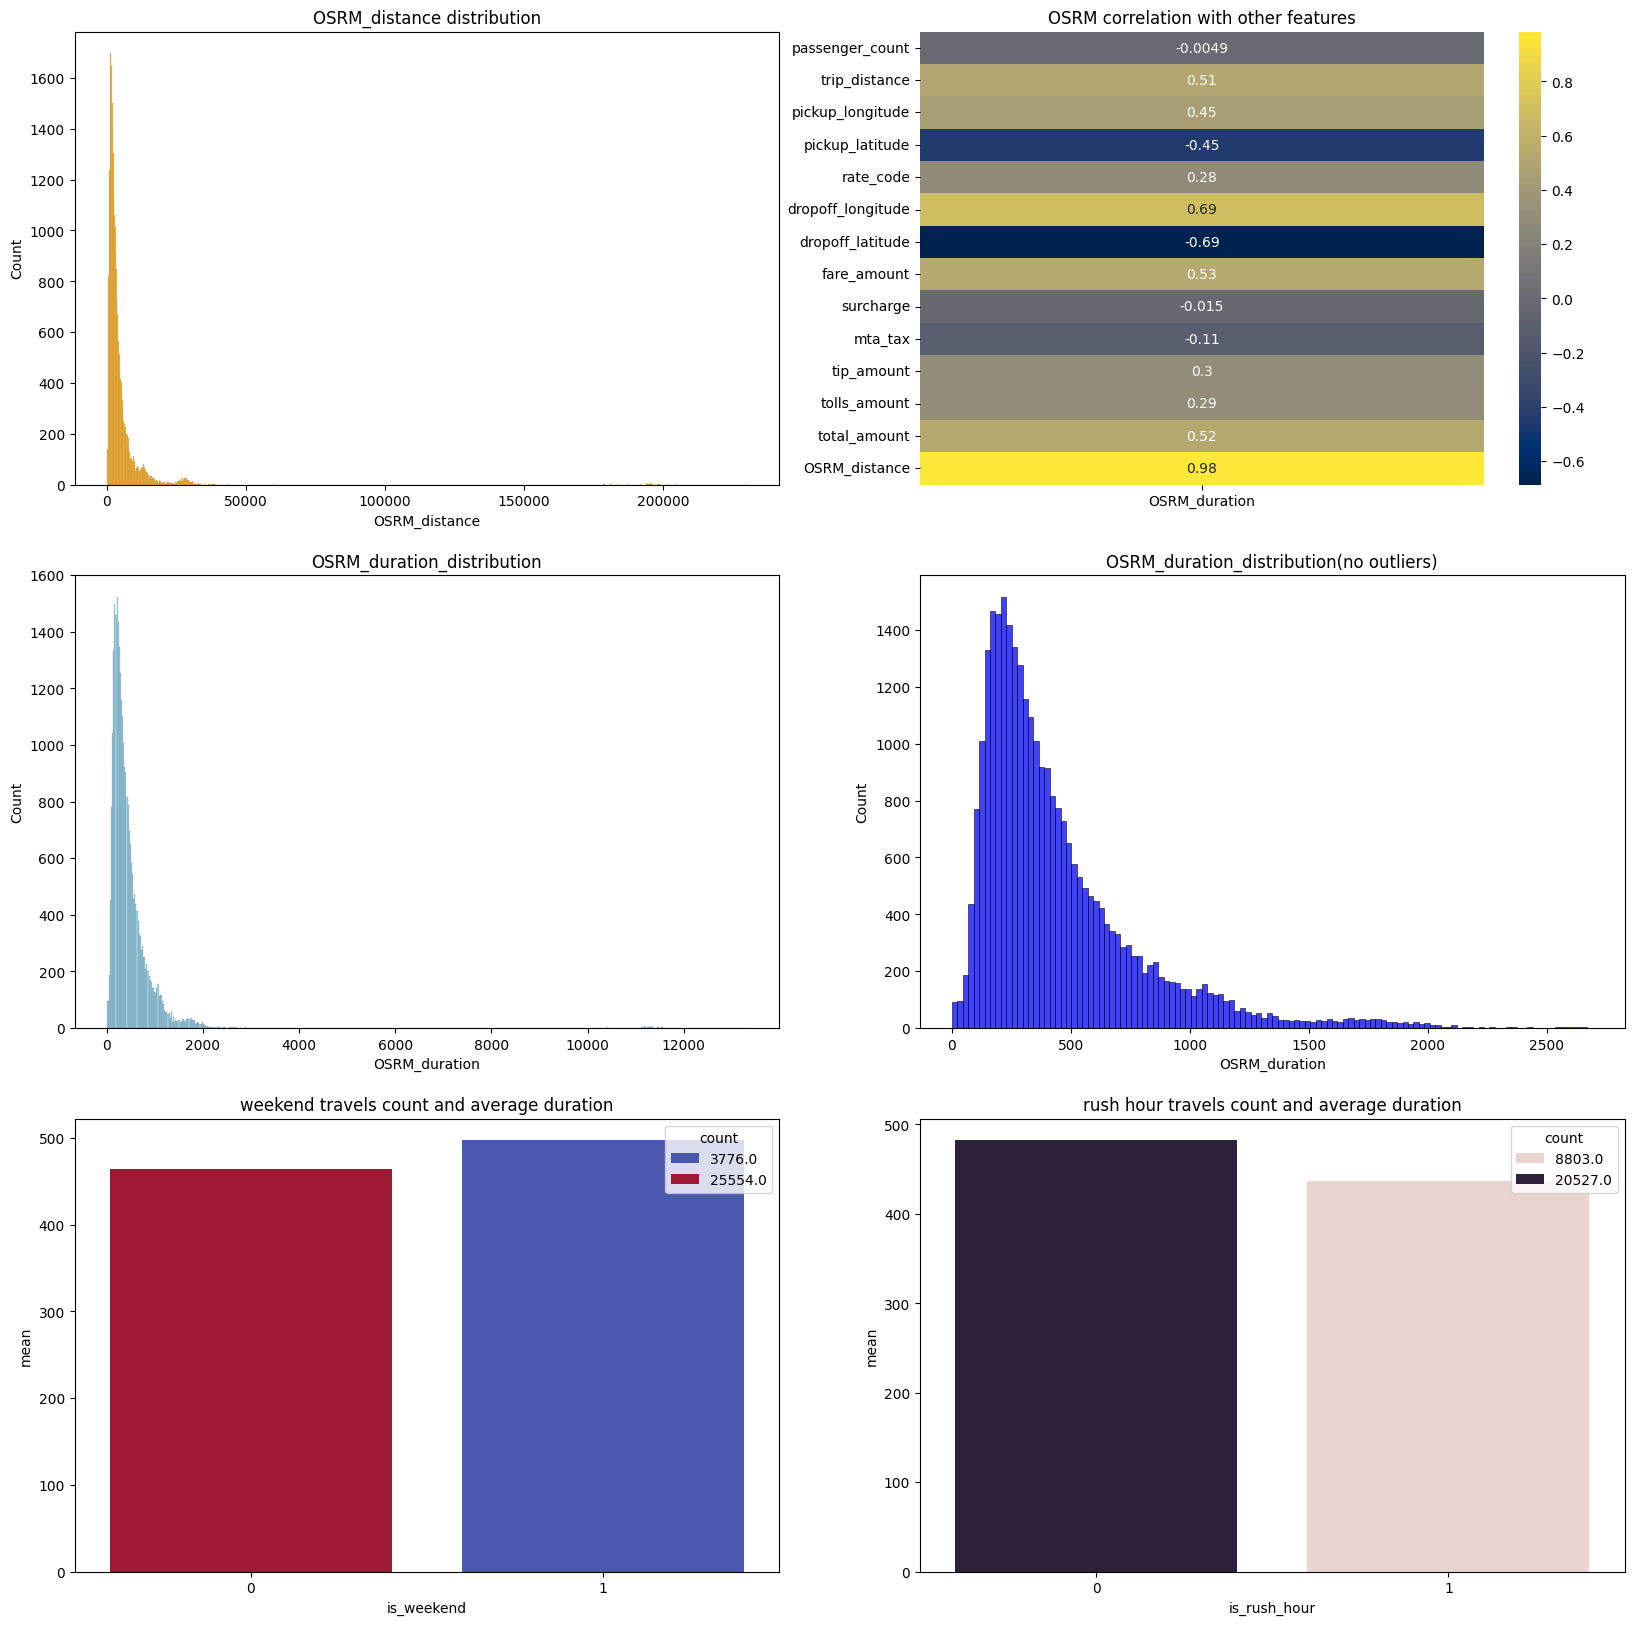

In [25]:
fig ,axes = plt.subplots(3, 2 , figsize=(20, 20)) 

sns.histplot(df['OSRM_distance'], ax=axes[0, 0], color='orange')
axes[0,0].set_title('OSRM_distance distribution')

sns.heatmap(pd.DataFrame(target_corr)
,  annot=True, cmap='cividis' , ax=axes[0,1])
axes[0, 1].set_title('OSRM correlation with other features')

sns.histplot(df['OSRM_duration'], ax=axes[1, 0] , color='skyblue')
axes[1,0].set_title('OSRM_duration_distribution')

_ , cleaned_duration = clean_from_outliers(df , df['OSRM_duration'])
sns.histplot(cleaned_duration, ax=axes[1, 1] , color='blue')
axes[1,1].set_title('OSRM_duration_distribution(no outliers)')

weekend_group = df.groupby("is_weekend")["OSRM_duration"].describe()
weekend_df = weekend_group.reset_index()
sns.barplot(x ='is_weekend', y='mean', hue='count', data=weekend_df , palette='coolwarm' , ax=axes[2, 0])
axes[2,0].set_title('weekend travels count and average duration')


rush_group = df.groupby('is_rush_hour')['OSRM_duration'].describe()
rush_group_df = rush_group.reset_index()
sns.barplot(x='is_rush_hour', y='mean' , hue='count', ax=axes[2, 1], data=rush_group_df)
axes[2,1].set_title('rush hour travels count and average duration')


#### as we can see even the count of trips is significantly lower in rush hours and weeekend compare to all days but mean duration is keeping up , telling that time duration in weekend and rush hours are high and also high correlation between travel distance and travel duration of OSRM is extremaly positive and other features like fare amound and etc.. are more moderate 

### our cleaned data from outliers 

In [26]:
x_train = cleaned_train 
y_train = cleaned_target

### with sklearn feature selection  , i decided to select some highly correlated features with our target

In [27]:
from sklearn.feature_selection import SelectKBest , f_regression

selector_duration = SelectKBest(score_func=f_regression, k=6)

selected_xtrain =selector_duration.fit_transform(x_train, y_train)  

selected_xtest = selector_duration.transform(x_test)
selected_train_features = x_train.columns[selector_duration.get_support()] 
selected_xtest_featuers = x_test.columns[selector_duration.get_support()]

selected_train_df = x_train[selected_train_features]
selected_xtest_df = x_test[selected_xtest_featuers]

#### pionts to consider , feature selection in sklearn might not choose boolean type (0 ,1) in our model becuase it doesn't have trend that alighns with target , we have to add it manaully sometimes


In [28]:
C_selected_train_df = selected_train_df.copy()
C_selected_xtest_df = selected_xtest_df.copy()

C_selected_train_df[['is_weekend' , 'is_rush_hour']] = x_train[['is_weekend' , 'is_rush_hour']]
C_selected_xtest_df[['is_weekend' , 'is_rush_hour']] = x_test[['is_weekend' , 'is_rush_hour']]
x_train = C_selected_train_df 
x_test = C_selected_xtest_df 

### lets normalize our train and test data seperatly too 

In [29]:
cy_train_df = pd.DataFrame(np.array(y_train).reshape(-1 ,1))
cy_test_df = pd.DataFrame(np.array(y_test).reshape(-1 ,1))
cy_train_df.columns = ['values']
cy_test_df.columns = ['values']
cy_train_df.shape  , cy_test_df.shape

((23411, 1), (5867, 1))

In [30]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler() 
y_scaler = MinMaxScaler() 


scaled_train_df = x_scaler.fit_transform(x_train)
#lets reshape cy_train to be 2d for fit transform
scaled_xtest = x_scaler.transform(x_test)
scaled_ytrain_df = y_scaler.fit_transform(cy_train_df)
scaled_ytest_df = y_scaler.transform(cy_test_df)

x_train = pd.DataFrame(scaled_train_df , columns=x_train.columns)
y_train = pd.Series(np.squeeze(scaled_ytrain_df))
y_test = pd.Series(np.squeeze(scaled_ytest_df))
x_test = pd.DataFrame(scaled_xtest , columns=x_test.columns)


# lets bulid our model

In [31]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((23411, 8), (23411,), (5867, 8), (5867,))

In [64]:
import tensorflow as tf 
from tensorflow import keras 
from keras import layers 
train_shape  = x_train.shape[1]

input_layer = layers.Input(shape=(train_shape,))
model = layers.Dense(16 , activation='relu')(input_layer)
model = layers.Dropout(0.2)(model)
model = layers.Dense(8 , activation='relu')(model)
model = layers.Dropout(0.2)(model)
model = layers.Dense(4 , activation='relu')(model) 
# we are guessing duration , so we prevent negative values 
output_layer = layers.Dense(1, activation='linear')(model)
model = keras.Model(input_layer , output_layer)
model.summary()



Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
)

In [66]:
history = model.fit(x_train,y_train, epochs=50 , batch_size=256, validation_data=(x_test , y_test) , verbose=0)

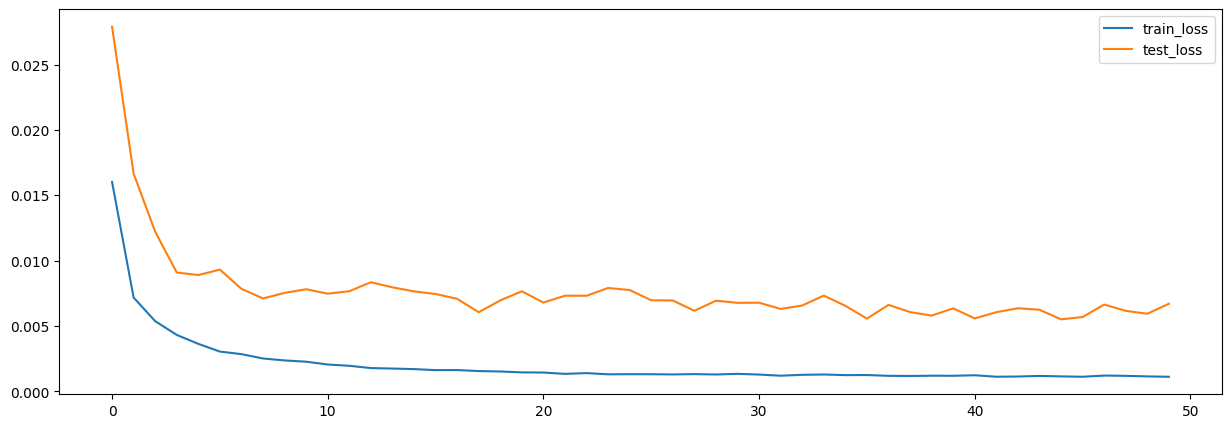

In [69]:
fig,axes = plt.subplots(figsize= (15, 5))

axes.plot(history.history['loss'], label ='train_loss')
axes.plot(history.history['val_loss'], label ='test_loss')
axes.legend()


  1/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


Text(0.5, 1.0, 'prediction Error , SMAPE: 15.41%')

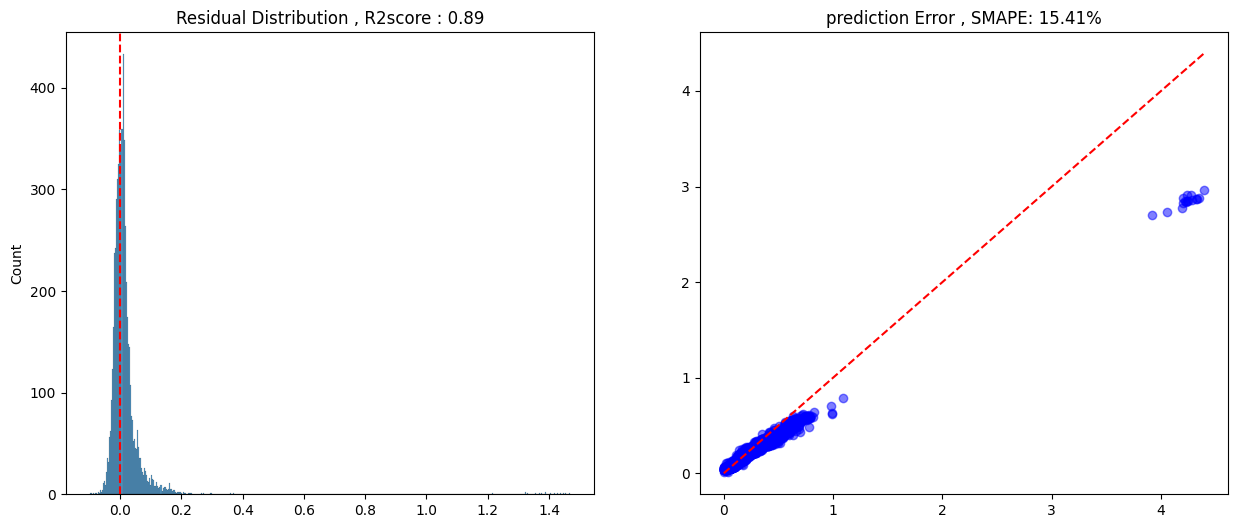

In [70]:
from sklearn.metrics import r2_score 

y_pred = model.predict(x_test)

residual = np.array(y_test) - np.squeeze(y_pred)

fig, axes = plt.subplots(1, 2, figsize = (15 ,6))
sns.histplot(residual.flat, ax=axes[0])
axes[0].axvline(0, color='red', linestyle='--') # minimum error 

r2 = r2_score(y_test , y_pred)
axes[0].set_title(f"Residual Distribution , R2score : {r2:.2f}")


axes[1].scatter(y_test, y_pred, alpha=0.5, color='blue')
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line

def smape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.squeeze(y_pred)
    return 100 * np.mean(np.abs(y_test - y_pred) / ((np.abs(y_test) + np.abs(y_pred)) / 2))

smape_value = smape(y_test, y_pred)
axes[1].set_title(f'prediction Error , SMAPE: {smape_value:.2f}%')
